Heart

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

Data loaded successfully.
Initial data shape: (1025, 14)
Data shape after dropping missing values: (1025, 14)
Data summary:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.07151

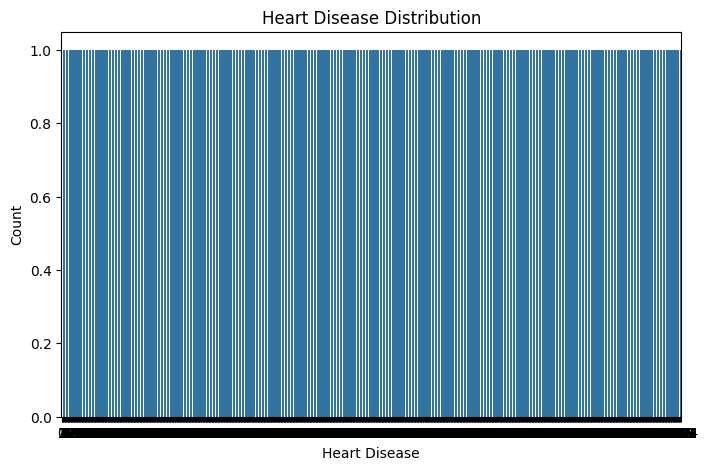

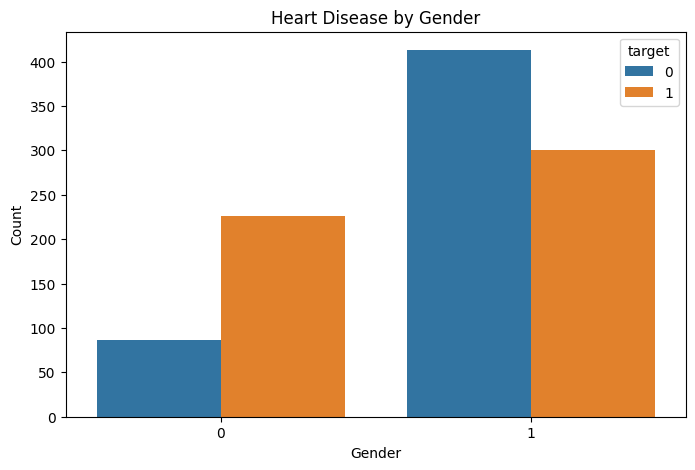

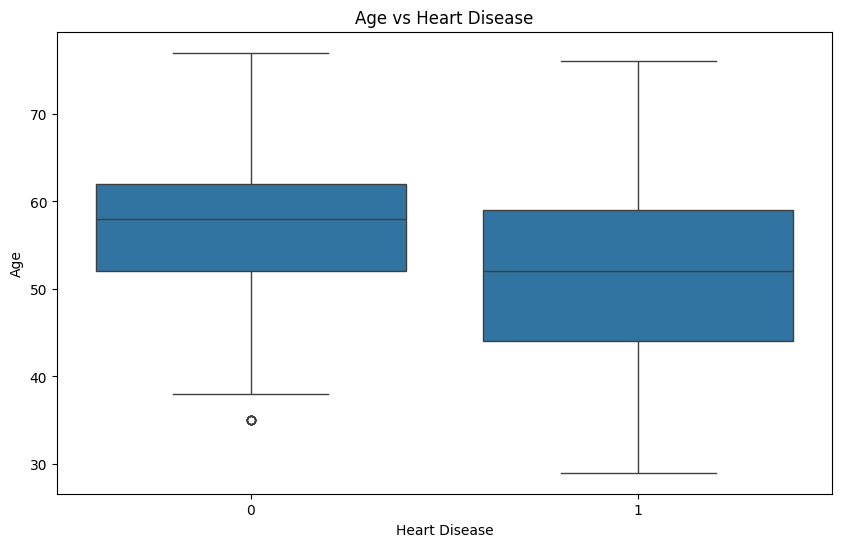

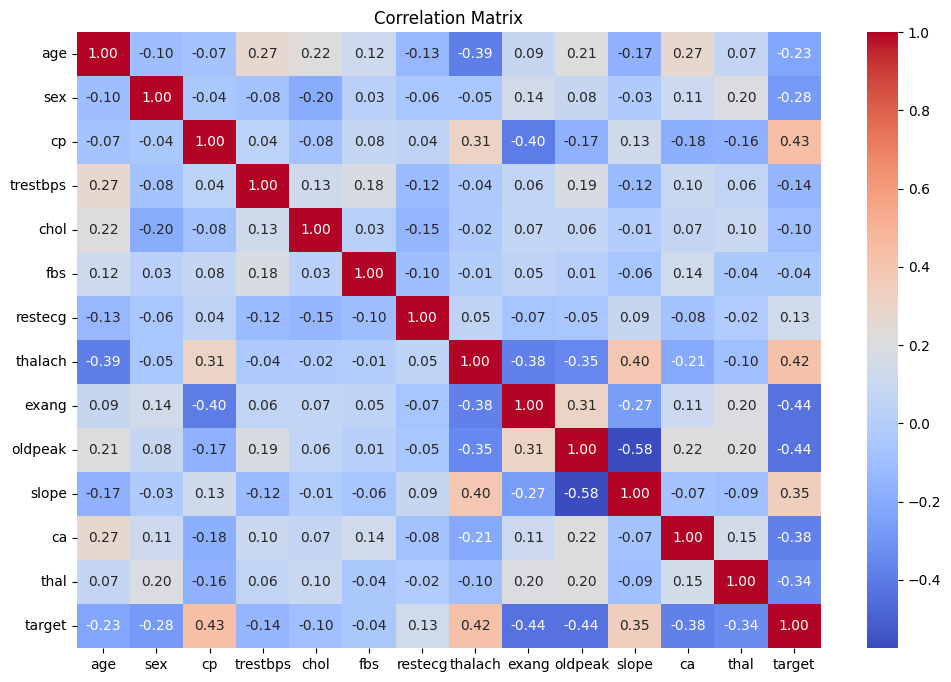

Dashboard-ready data exported to dashboard_data.csv.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract - Load the dataset
def load_data(filepath):
    """Load the dataset from a CSV file."""
    try:
        data = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Step 2: Transform - Clean and preprocess the data
def preprocess_data(data):
    """Perform data cleaning and preprocessing."""
    print("Initial data shape:", data.shape)

    # Handle missing values
    data = data.dropna()  # Dropping rows with missing values
    print("Data shape after dropping missing values:", data.shape)

    # Rename columns for clarity (if necessary)
    data.columns = [col.lower().replace(' ', '_') for col in data.columns]

    return data

# Step 3: Load - Prepare data for analysis
def prepare_analysis_data(data):
    """Generate summaries and prepare data for analysis."""
    print("Data summary:\n", data.describe())
    print("Data types:\n", data.dtypes)

    # Generate categorical summaries
    for column in data.select_dtypes(include=['object']).columns:
        print(f"Value counts for {column}:\n", data[column].value_counts())

    return data

# Step 4: Perform EDA
def perform_eda(data):
    """Perform exploratory data analysis."""
    print("Performing EDA...")

    # Check column names
    print("Columns in the dataset:", data.columns)

    # Distribution of heart disease
    plt.figure(figsize=(8, 5))
    sns.countplot(data['target'])  # Update column name if needed
    plt.title("Heart Disease Distribution")
    plt.xlabel("Heart Disease")
    plt.ylabel("Count")
    plt.show()

    # Heart disease by gender
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x='sex', hue='target')  # Update column names if needed
    plt.title("Heart Disease by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

    # Age vs Heart disease
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y='age', data=data)  # Update column names if needed
    plt.title("Age vs Heart Disease")
    plt.xlabel("Heart Disease")
    plt.ylabel("Age")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Step 5: Generate Dashboard-ready Outputs
def generate_dashboard_data(data, output_file="dashboard_data.csv"):
    """Export data for dashboard creation."""
    data.to_csv(output_file, index=False)
    print(f"Dashboard-ready data exported to {output_file}.")

# Main function
def main(filepath):
    data = load_data(filepath)
    if data is not None:
        cleaned_data = preprocess_data(data)
        prepared_data = prepare_analysis_data(cleaned_data)
        perform_eda(prepared_data)
        generate_dashboard_data(prepared_data)

# Run the script
if __name__ == "__main__":
    file_path = "Heart Disease data.csv"  # Update this path if needed
    main(file_path)
